In [89]:
#coding: utf-8

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("punkt")
nltk.download('rslp')
nltk.download('stopwords')
from nltk.stem import RSLPStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
textData = pd.read_csv('https://raw.githubusercontent.com/yurikelvin/lab02_recinfo/master/results.csv')['text'].tolist()
 


# **1) Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas).**

Definindo funções de tratamento de palavras ou listas de strings

In [0]:
def removeSymbols(string):
  # Remove symbols and digits in start or end of string (excluding years)
  newString = ''
  newString = newString.join([word for word in string]) # simple copy
  
  if(not newString.isdigit()): # Ignora strings formada exclusivamente de digitos
    if(not newString[0].isalpha()):
      symbols = re.search(r'(^\W+\d+|^\W+|^\d+)', newString) # Procura as ocorrências dos simbolos no começo da string (que não são do alfabeto)
      newString = newString[len(symbols.group()):] # nova string sem os simbolos iniciais (que não são do alfabeto)
    if(newString != '' and (not newString[-1].isalpha())):
      symbols = re.search(r'(\d+\W+$|\W+$|\d+$)', newString) # Procura as ocorrências dos simbolos no final da string (que não são do alfabeto)
      newString = newString[:-(len(symbols.group()))] # nova string sem os simbolos finais (que não são do alfabeto)
  else: # Strings formadas exclusivamente de digitos
    symbols = re.search(r'^\W+', newString) # Procura as ocorrências dos simbolos no começo da string (que não são do alfabeto e não são digitos)
    if(symbols != None):
      newString = newString[len(symbols.group()):]
    symbols = re.search(r'\W+$', newString) # Procura as ocorrências dos simbolos no final da string (que não são do alfabeto e não são digitos)
    if(symbols != None):
      newString = newString[:-(len(symbols.group()))]
        
        
  
  return newString

def splitListOfString(listToSplit, separator):
    # Split a list of strings based on separator
    newList = []
    
    for word in listToSplit:
      separatedWords = word.split(separator)
      if(len(separatedWords) > 1):
        newList += separatedWords
      else:
        newList.append(word)
   
    return newList




*  Tokenização
*  Todas palavras viraram minúsculas
*  Remoção de palavras com menos de 3 caracteres (Ex: remoção de artigos definidos)
*  Remoção de sequências númericas que não eram um ano (Ex: '123456')
*  Remoção de símbolos nos tokens (Ex: '-abril' virou 'abril')
*  Split das palavras que antecedia um ponto  (Ex: 'end.Begin' virou duas palavras ['end', Begin'])
*  Remoção de tokens que são stop words (carregam pouca informação importante ao contrário das palavras-chave, melhora tempo de
resposta, melhora efetividade)




In [0]:
tokens = []
stopwords = nltk.corpus.stopwords.words('portuguese')


for i in range(len(textData)):
  tokensTokenizeDraft = nltk.word_tokenize(textData[i])
  # Filtrando melhor os tokens
  # Separando as palavras juntas de ponto
  dotSeparator = '.'
  tokensDraft = splitListOfString(tokensTokenizeDraft, dotSeparator)

      
  for element in tokensDraft:
    if(len(element) >= 3): # Aceitando apenas palavras com mais de 3 caracteres
      newToken = removeSymbols(element.lower()) # Remove simbolos do token, fazendo um tratamento do token, colocando somente palavras minúsculas
      if(not (newToken.isdigit() and len(newToken) > 4) and len(newToken) >= 3 and newToken not in stopwords):
        # O token passado não é uma string de digitos (deixando passar as strings que representam anos)
        # O token é uma palavra com mais de 3 caracteres
        # O token é uma palavra que não é uma stopword
        tokens.append(newToken)

# **2) Refaça a questão 2 do Laboratório anterior usando os tokens produzidos**

In [0]:
frequencyWords = Counter(tokens)

most50CommonWords = frequencyWords.most_common(50)

totalWords = len(tokens)

tableContent = {'Word':[], 'Freq': [], 'r':[], 'Pr(%)':[], 'r.Pr':[]}
for i in range(50): # Top 50
  nameWord = most50CommonWords[i][0]
  freqWord = most50CommonWords[i][1]
  rankWord = i + 1
  prWord = round((freqWord / totalWords)*100, 2)
  rPrWord = round((prWord/100.0)*rankWord, 3)
  
  tableContent['Word'].append(nameWord)
  tableContent['Freq'].append(freqWord)
  tableContent['r'].append(rankWord)
  tableContent['Pr(%)'].append(prWord)
  tableContent['r.Pr'].append(rPrWord)
  

In [19]:
dfTop50 = pd.DataFrame(tableContent)

dfTop50.index += 1
dfTop50

,Word,Freq,r,Pr(%),r.Pr
1,anos,584,1,0.50,0.005
2,ser,504,2,0.43,0.009
3,sobre,426,3,0.36,0.011
4,bolsonaro,375,4,0.32,0.013
5,presidente,370,5,0.32,0.016
6,governo,352,6,0.30,0.018
7,país,339,7,0.29,0.020
8,ainda,337,8,0.29,0.023
9,brasil,332,9,0.28,0.025
10,ter,256,10,0.22,0.022


# **3) Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.**

* Aplicando o processo de stemming nos tokens produzidos



In [0]:
st = RSLPStemmer()

tokensWithStem = []
for token in tokens:
  tokensWithStem.append(st.stem(token))


In [84]:
tokensWithStem

['juíz',
 'feder',
 'ivan',
 'silv',
 'luz',
 'brasíl',
 'proib',
 'carát',
 'limin',
 'nest',
 'sexta-f',
 'forç',
 'arm',
 'comemor',
 'espec',
 'uso',
 'dinh',
 'públic',
 'aniversári',
 'golp',
 'est',
 '1964',
 'instaur',
 'ditad',
 'milit',
 'brasil',
 'milit',
 'pref',
 'març',
 'abril',
 'part',
 'presid',
 'ultradireit',
 'jair',
 'bolsonar',
 'tent',
 'suaviz',
 'ord',
 'cit',
 'dia',
 'rememor',
 'silv',
 'luz',
 'text',
 'divulg',
 'minist',
 'defês',
 'ord',
 'dia',
 'alus',
 'març',
 '1964',
 'lid',
 'algum',
 'quartel',
 'compat',
 'process',
 'reconstruç',
 'democrá',
 'promov',
 'constitu',
 '1988',
 'desobedec',
 'princípi',
 'preval',
 'direit',
 'human',
 'ign',
 'decis',
 'cort',
 'interameric',
 'direit',
 'human',
 '2018',
 'conden',
 'est',
 'brasil',
 'apur',
 'julg',
 'respons',
 'mort',
 'jornal',
 'vladim',
 'herzog',
 'ditad',
 'milit',
 'magistr',
 'pontu',
 'dat',
 'comemor',
 'dev',
 'ser',
 'aprov',
 'congress',
 'justapõ',
 'text',
 'chancel',
 'forç',

Falso Positivo:
---


* **bolsonaro -> bolsonar**
* **defesa -> defês**
* **dias -> dia (nome do ministro)**
* **união -> uni (nome do órgão)**
* **marcos -> marc**
* **universidade -> univers**
* **jornalista -> jornal**
* **dois -> doi**
* **tatis -> tatil(nome de pessoa)**
* **brasileiro -> brasil**



---

**Falso Negativo:**

* **alguns -> algum**
* **quartéis -> quartel**
* **elogiosamente -> elogios**
* **anos -> ano**
* **fazendo -> faz**
* **liberais -> liberal**
* **pejorativa -> pejora**
* **possíveis -> possível**
* **dizer -> diz**
* **vezes -> vez**



# Os impactos que esses falsos positivos e negativos teriam no processamento de consulta é que se tiver um erro no processo de stemming, quando a consulta for feita, o que o usuário pediu para consultar talvez os resultados da busca não estejam de acordo com o que foi pedido pois esse processo tenta agrupar as palavras que tenham o mesmo significado. Exemplo: Levemos em consideração a palavra "universidade", o stemming dela pode ser traduzido para "univers" e a palavra "universo" também pode levar para "univers", veja que "universo" e "universidade" são de domínios diferentes, ou seja, se o usuário pesquisar por universidade, não terá significância retornar para ele resultados de universo.

# **4) Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?**

In [0]:
frequencyWordsStem = Counter(tokensWithStem)

most50CommonWordsStem = frequencyWordsStem.most_common(50)

totalWordsStem = len(tokensWithStem)

tableContentStem = {'Word':[], 'Freq': [], 'r':[], 'Pr(%)':[], 'r.Pr':[]}
for i in range(50): # Top 50
  nameWord = most50CommonWordsStem[i][0]
  freqWord = most50CommonWordsStem[i][1]
  rankWord = i + 1
  prWord = round((freqWord / totalWordsStem)*100, 2)
  rPrWord = round((prWord/100.0)*rankWord, 3)
  
  tableContentStem['Word'].append(nameWord)
  tableContentStem['Freq'].append(freqWord)
  tableContentStem['r'].append(rankWord)
  tableContentStem['Pr(%)'].append(prWord)
  tableContentStem['r.Pr'].append(rPrWord)
  
dfTop50Stem = pd.DataFrame(tableContentStem)

dfTop50Stem.index += 1

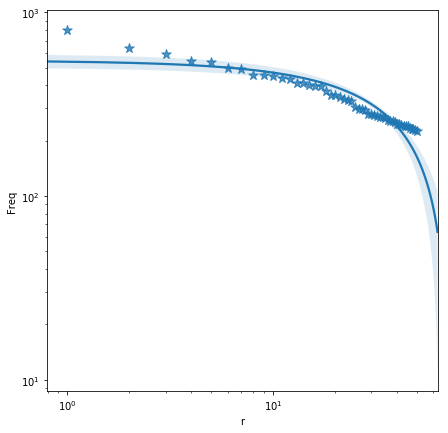

In [91]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq", dfTop50Stem, ax=ax, marker="*", scatter_kws={"s": 100})

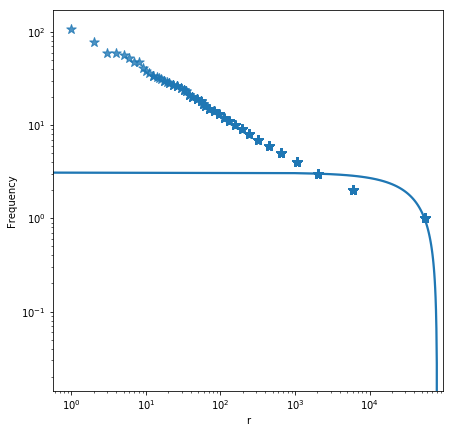

In [92]:
bigrams = []
bigrams = nltk.bigrams(tokensWithStem)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_df = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_df['r'] = bigrams_df['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_df, ax=ax, marker="*", scatter_kws={"s": 100})